## **Context**

Sebuah perusahaan bernama Northwind Traders bergerak dibidang export - import makanan di seluruh dunia. Dari database Northwind tersebut perusahaan ingin mendapatkan insight yang dapat dijalankan dari segmentasi produknya, sehingga perusahaan dapat menerapkan strategi untuk meningkatkan kualitas dan meningkatkan penjualan produk



## **Database Information** ##

Sumber Database: https://www.mysqltutorial.org/wp-content/uploads/2018/03/mysqlsampledatabase.zip

Database yang dimiliki mempunyai 10 tabel, yaitu:
- Categories : Menyimpan informasi tentang categories.
- Customers : Menyimpan informasi tentang data pelanggan/customer.        
- Employees : Menyimpan semua informasi karyawan serta struktur organisasi, seperti siapa melapor kepada siapa.       
- Orderdetails : Menyimpan detail dari setiap pesanan yang dilakukan oleh pelanggan.
- Orders : Menyimpan informasi jual-beli yang dilakukan oleh pelanggan.              
- Products : Menyimpan informasi tentang jenis produk/kendaraan.             
- Region : Menyimpan Informasi tentang provinsi/kota             
- Shippers : Menyimpan informasi tentang pengiriman             
- Suppliers : Menyimpan informasi tentang penyuplai
- Territories : Menyimpan informasi tentang wilayah

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

Fokus analisis disini mengenai Produk sehingga tabel utama yang digunakan adalah tabel Produk

## **DATABASE**

In [1]:
import numpy as np
import pandas as pd
import mysql.connector as sqlcon

In [2]:
mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'alpinwinata123',
    database = 'northwind'
)

In [3]:
curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

### **DATA DETAIL TABEL PRODUK YANG DI GUNAKAN**
Data yang akan dianalisis ini berasal dari tabel Product. 
Dari tabel tersebut diambil beberapa kolom yang akan digunakan. Informasi-informasi yang diambil adalah:

- c.ProductID dari tabel product
- c.ProductName dari tabel product
- c.SupplierID dari tabel product
- c.CategoryID dari tabel product
- c.QuantityPerUnit dari tabel product
- c.UnitPrice dari tabel product
- c.UnitsInStock dari tabel product
- c.UnitsOnOrder dari tabel product
- c.ReorderLevel dari tabel product
- c.Discontinued dari tabel product

In [4]:
tabel1 = sql_table (
    '''
    select * from products;
    '''
)
tabel1

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.0000,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.0000,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.0000,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.0000,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.3500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
72,73,Rd Kaviar,17,8,24 - 150 g jars,15.0000,101,0,5,0
73,74,Longlife Tofu,4,7,5 kg pkg.,10.0000,4,20,5,0
74,75,Rhnbru Klosterbier,12,1,24 - 0.5 l bottles,7.7500,125,0,25,0
75,76,Lakkalikri,23,1,500 ml,18.0000,57,0,20,0


## **DATA ANOMALIES**

In [5]:
tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ProductID        77 non-null     int64 
 1   ProductName      77 non-null     object
 2   SupplierID       77 non-null     int64 
 3   CategoryID       77 non-null     int64 
 4   QuantityPerUnit  77 non-null     object
 5   UnitPrice        77 non-null     object
 6   UnitsInStock     77 non-null     int64 
 7   UnitsOnOrder     77 non-null     int64 
 8   ReorderLevel     77 non-null     int64 
 9   Discontinued     77 non-null     int64 
dtypes: int64(7), object(3)
memory usage: 6.1+ KB


## **MISSING VALUES**

In [6]:
tabel1.isna().sum()

ProductID          0
ProductName        0
SupplierID         0
CategoryID         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

### **MENGUBAH DATA YANG SALAH**

In [7]:
tabel1['UnitPrice'] = pd.to_numeric(tabel1['UnitPrice'])

In [8]:
tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ProductID        77 non-null     int64  
 1   ProductName      77 non-null     object 
 2   SupplierID       77 non-null     int64  
 3   CategoryID       77 non-null     int64  
 4   QuantityPerUnit  77 non-null     object 
 5   UnitPrice        77 non-null     float64
 6   UnitsInStock     77 non-null     int64  
 7   UnitsOnOrder     77 non-null     int64  
 8   ReorderLevel     77 non-null     int64  
 9   Discontinued     77 non-null     int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ KB


### **DATA DUPLICATE**

In [9]:
tabel1[tabel1.duplicated()]

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued


### **PREVIEW CLEANING DATA**

In [10]:
tabel1.sample(10)

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
8,9,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97.00,29,0,0,1
65,66,Louisiana Hot Spiced Okra,2,2,24 - 8 oz jars,17.00,4,100,20,0
71,72,Mozzarella di Giovanni,14,4,24 - 200 g pkgs.,34.80,14,0,0,0
7,8,Northwoods Cranberry Sauce,3,2,12 - 12 oz jars,40.00,6,0,0,0
41,42,Singaporean Hokkien Fried Mee,20,5,32 - 1 kg pkgs.,14.00,26,0,0,1
43,44,Gula Malacca,20,2,20 - 2 kg bags,19.45,27,0,15,0
63,64,Wimmers gute Semmelkndel,12,5,20 bags x 4 pieces,33.25,22,80,30,0
54,55,Pt chinois,25,6,24 boxes x 2 pies,24.00,115,0,20,0
6,7,Uncle Bob's Organic Dried Pears,3,7,12 - 1 lb pkgs.,30.00,15,0,10,0
45,46,Spegesild,21,8,4 - 450 g glasses,12.00,95,0,0,0


### **GENERAL INFO CLEANING DATA**

In [11]:
datadesc = []
for i in tabel1.columns:
    datadesc.append([i,
                     tabel1[i].dtypes,
                     tabel1[i].isna().sum(),
                     round((tabel1[i].isna().sum()/len(tabel1)*100),2),
                     tabel1[i].nunique(),
                     tabel1[i].drop_duplicates().sample(2).values])

pd.DataFrame(datadesc,columns=['Data Features',
                               'Data Types',
                               'Null',
                               'Null Percentage',
                               'Unique',
                               'Unique Sample'])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,ProductID,int64,0,0.0,77,"[37, 29]"
1,ProductName,object,0,0.0,77,"[Raclette Courdavault, Aniseed Syrup]"
2,SupplierID,int64,0,0.0,29,"[17, 24]"
3,CategoryID,int64,0,0.0,8,"[3, 1]"
4,QuantityPerUnit,object,0,0.0,70,"[40 - 100 g pkgs., 1k pkg.]"
5,UnitPrice,float64,0,0.0,62,"[38.0, 81.0]"
6,UnitsInStock,int64,0,0.0,51,"[20, 9]"
7,UnitsOnOrder,int64,0,0.0,10,"[60, 50]"
8,ReorderLevel,int64,0,0.0,7,"[25, 30]"
9,Discontinued,int64,0,0.0,2,"[0, 1]"


In [22]:
tabel1.sort_values(["UnitsInStock", "UnitsOnOrder", "ReorderLevel"], ascending=False)

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
74,75,Rhnbru Klosterbier,12,1,24 - 0.5 l bottles,7.75,125,0,25,0
39,40,Boston Crab Meat,19,8,24 - 4 oz tins,18.40,123,0,30,0
5,6,Grandma's Boysenberry Spread,3,2,12 - 8 oz jars,25.00,120,0,25,0
54,55,Pt chinois,25,6,24 boxes x 2 pies,24.00,115,0,20,0
60,61,Sirop d'rable,29,2,24 - 500 ml bottles,28.50,113,0,25,0
...,...,...,...,...,...,...,...,...,...,...
30,31,Gorgonzola Telino,14,4,12 - 100 g pkgs,12.50,0,70,20,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
16,17,Alice Mutton,7,6,20 - 1 kg tins,39.00,0,0,0,1
28,29,Thringer Rostbratwurst,12,6,50 bags x 30 sausgs.,123.79,0,0,0,1


In [13]:
tabel1.describe()

,ProductID,SupplierID,CategoryID,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,13.649351,4.116883,28.866364,40.506494,10.129870,12.467532,0.103896
std,22.371857,8.220267,2.395028,33.815111,36.147222,23.141072,10.931105,0.307127
min,1.000000,1.000000,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7.000000,2.000000,13.250000,15.000000,0.000000,0.000000,0.000000
50%,39.000000,13.000000,4.000000,19.500000,26.000000,0.000000,10.000000,0.000000
75%,58.000000,20.000000,6.000000,33.250000,61.000000,0.000000,25.000000,0.000000
max,77.000000,29.000000,8.000000,263.500000,125.000000,100.000000,30.000000,1.000000


### **CEK DATA OUTLIERS**

In [14]:
def cek_outliers(tabel1,col):
    Q1 = tabel1[col].describe()['25%']
    Q3 = tabel1[col].describe()['75%']
    IQR = Q3-Q1
    UF = Q3 + (1.5*IQR)
    LF = Q1 - (1.5*IQR)
    tabel_outliers = tabel1[(tabel1[col] < LF) | (tabel1[col] > UF)]
    if len(tabel_outliers) == 0:
           return "No Outliers"
    else:
           return tabel_outliers

In [23]:
cek_outliers(tabel1,'UnitsInStock')

'No Outliers'

In [15]:
cek_outliers(tabel1,'UnitsOnOrder')

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
10,11,Queso Cabrales,5,4,1 kg pkg.,21.00,22,30,30,0
20,21,Sir Rodney's Scones,8,3,24 pkgs. x 4 pieces,10.00,3,40,5,0
30,31,Gorgonzola Telino,14,4,12 - 100 g pkgs,12.50,0,70,20,0
31,32,Mascarpone Fabioli,14,4,24 - 200 g pkgs.,32.00,9,40,25,0
36,37,Gravad lax,17,8,12 - 500 g pkgs.,26.00,11,50,25,0
42,43,Ipoh Coffee,20,1,16 - 500 g tins,46.00,17,10,25,0
44,45,Rogede sild,21,8,1k pkg.,9.50,5,70,15,0
47,48,Chocolade,22,3,10 pkgs.,12.75,15,70,25,0


Dari tabel UnitsOnOrder ada 17 item UnitsOnOrder

In [16]:
cek_outliers(tabel1,'ReorderLevel')

'No Outliers'

##### **MENAMPILKAN UNITINSTOCK, UNITSONORDER DAN REORDER LEVEL PALING BANYAK SAMPAI PALING SEDIKIT**

In [17]:
pd.crosstab(index = tabel1["ProductName"],columns=["UnitsInStock"], values=tabel1["UnitsInStock"], 
            aggfunc="max").sort_values("UnitsInStock",ascending=False)

col_0,UnitsInStock
ProductName,
Rhnbru Klosterbier,125
Boston Crab Meat,123
Grandma's Boysenberry Spread,120
Pt chinois,115
Sirop d'rable,113
...,...
Perth Pasties,0
Thringer Rostbratwurst,0
Gorgonzola Telino,0


In [18]:
pd.crosstab(index = tabel1["ProductName"],columns=["UnitsOnOrder"], values=tabel1["UnitsOnOrder"], 
            aggfunc="max").sort_values("UnitsOnOrder",ascending=False)

col_0,UnitsOnOrder
ProductName,
Louisiana Hot Spiced Okra,100
Wimmers gute Semmelkndel,80
Aniseed Syrup,70
Chocolade,70
Rogede sild,70
...,...
Manjimup Dried Apples,0
Mishi Kobe Niku,0
Mozzarella di Giovanni,0


In [19]:
pd.crosstab(index = tabel1["ProductName"],columns=["ReorderLevel"], values=tabel1["ReorderLevel"], 
            aggfunc="max").sort_values("ReorderLevel",ascending=False)

col_0,ReorderLevel
ProductName,
Schoggi Schokolade,30
Gnocchi di nonna Alice,30
Boston Crab Meat,30
Wimmers gute Semmelkndel,30
NuNuCa Nu-Nougat-Creme,30
...,...
Mozzarella di Giovanni,0
Northwoods Cranberry Sauce,0
Perth Pasties,0


## **DATA VISUALIZATION AND STATISTICS**

##### **UNITS IN STOCK PALING BANYAK DAN PALING DIKIT**

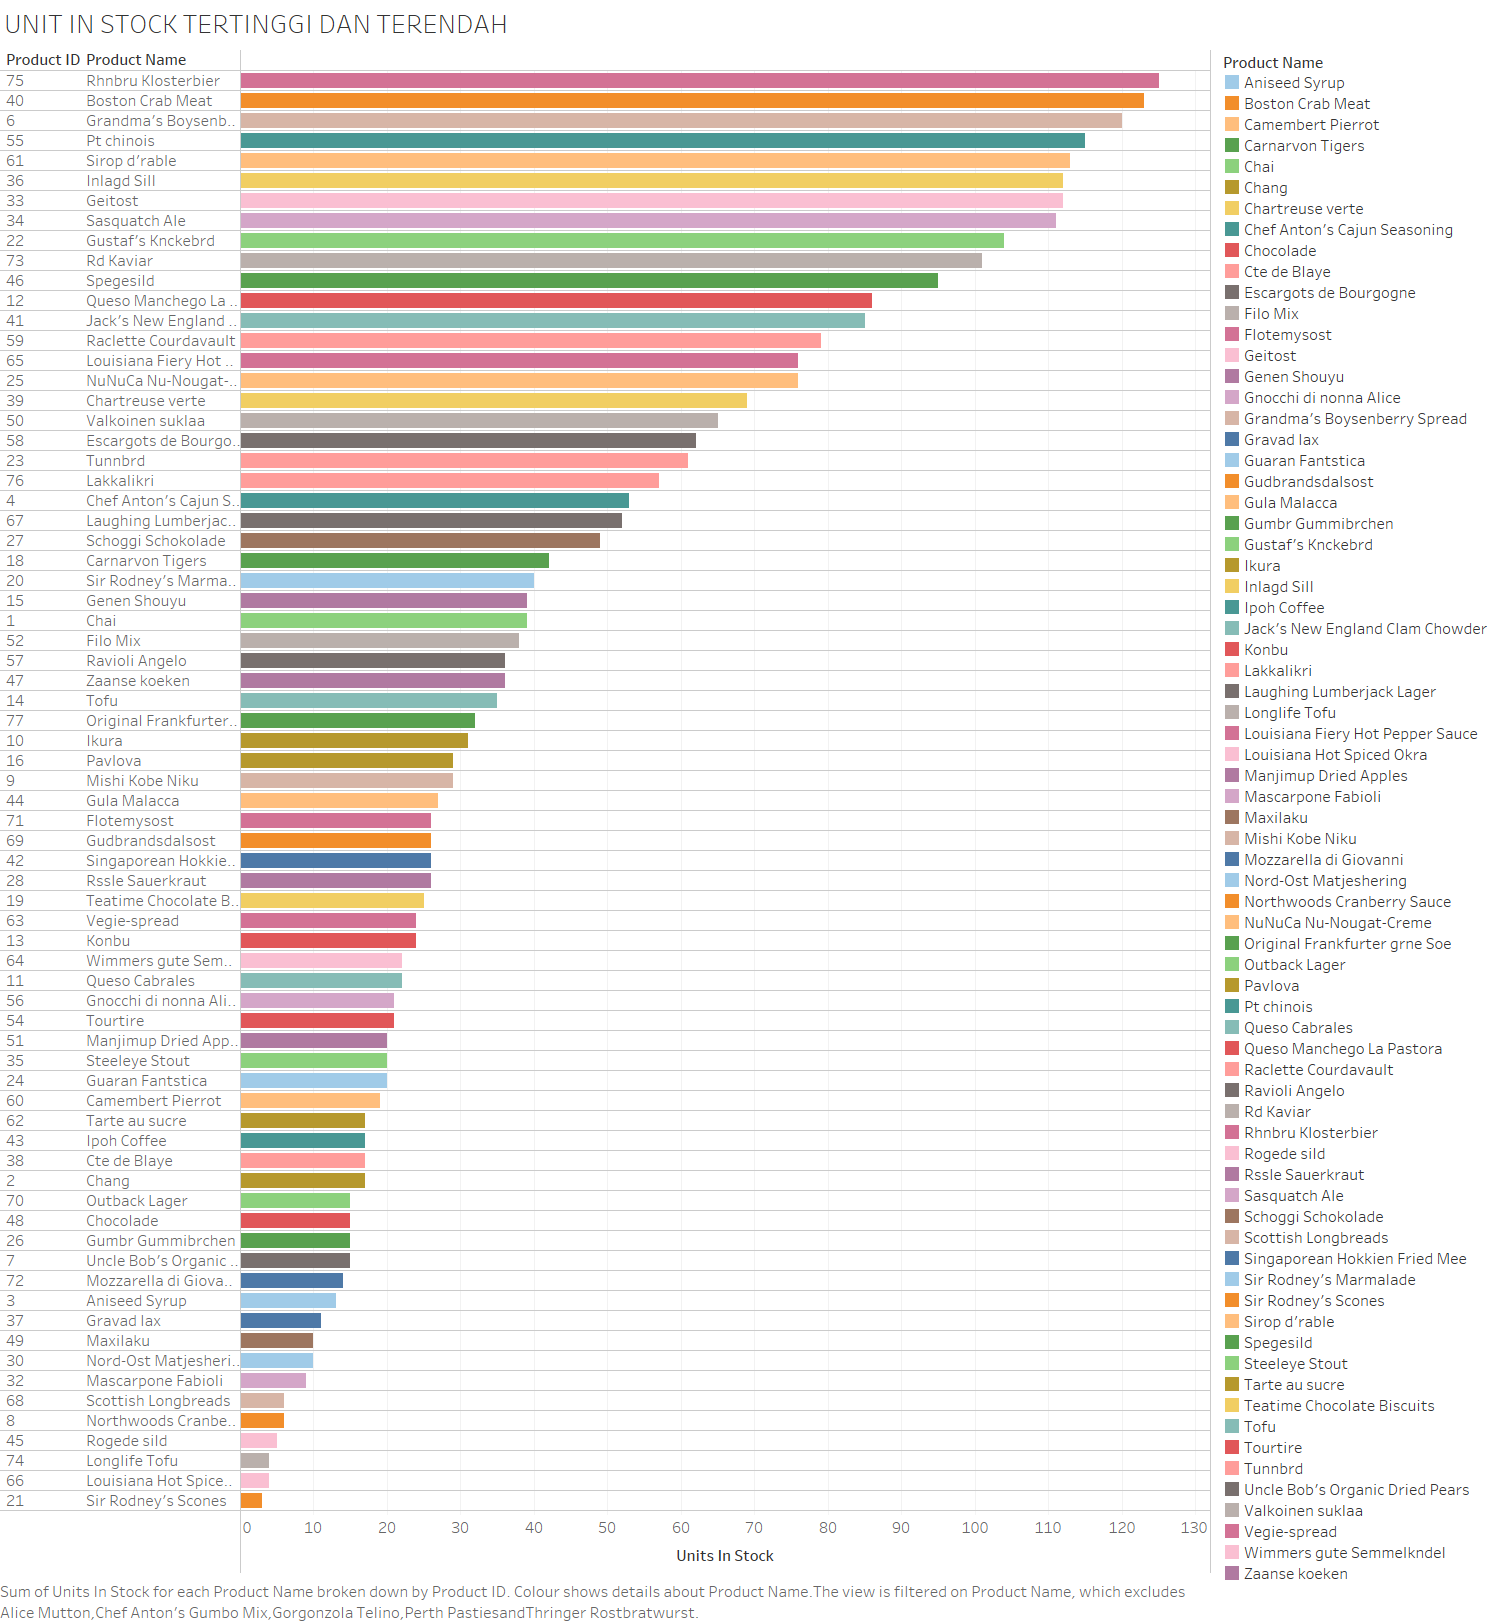

Dalam perusahaan yang memiliki gudang sangat penting untuk melihat stock yang paling banyak dan paling sedikit.
Oleh karena itu saya menampilkan Stock terbanyak dan Stock terdikit

Stock yang paling banyak adalah
- Rhnbru Klosterbier sebanyak 125 unit

Stock yang paling dikit adalah
- Sir Rodney's Scones sebanyak 3 unit

## **INSIGHT**

Jadi stock yang paling banyak bisa di jual terlebih dahulu dibandingkan dengan stock yang dikit.
Karena jika stock yang paling banyak tidak di jual akan menumpuk di gudang

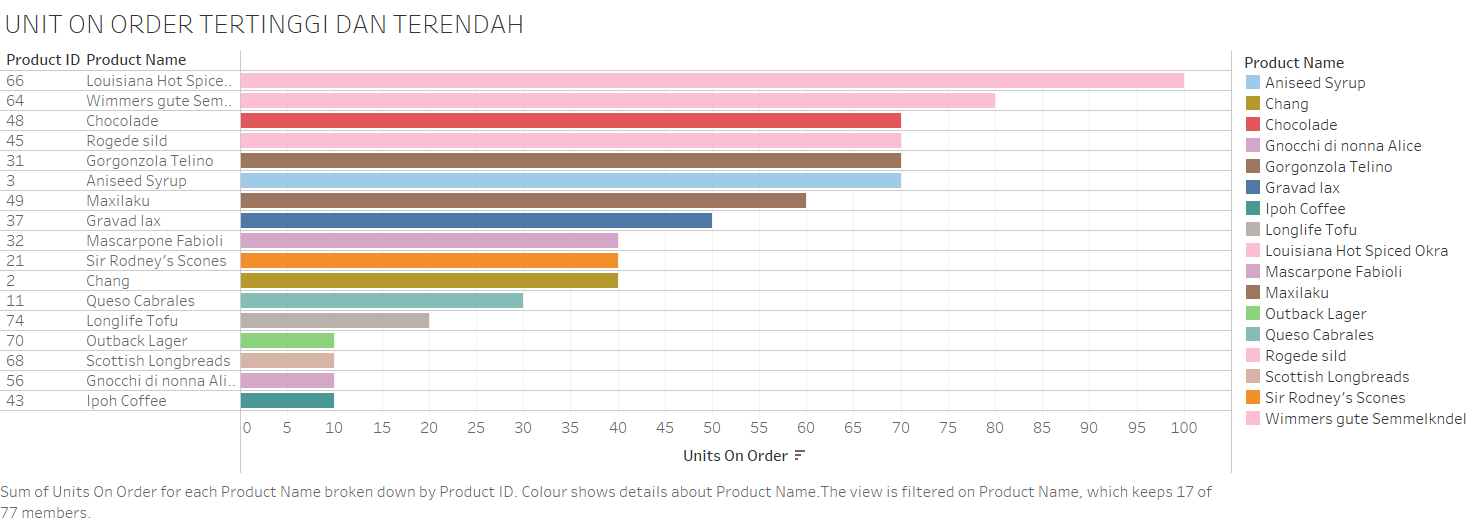

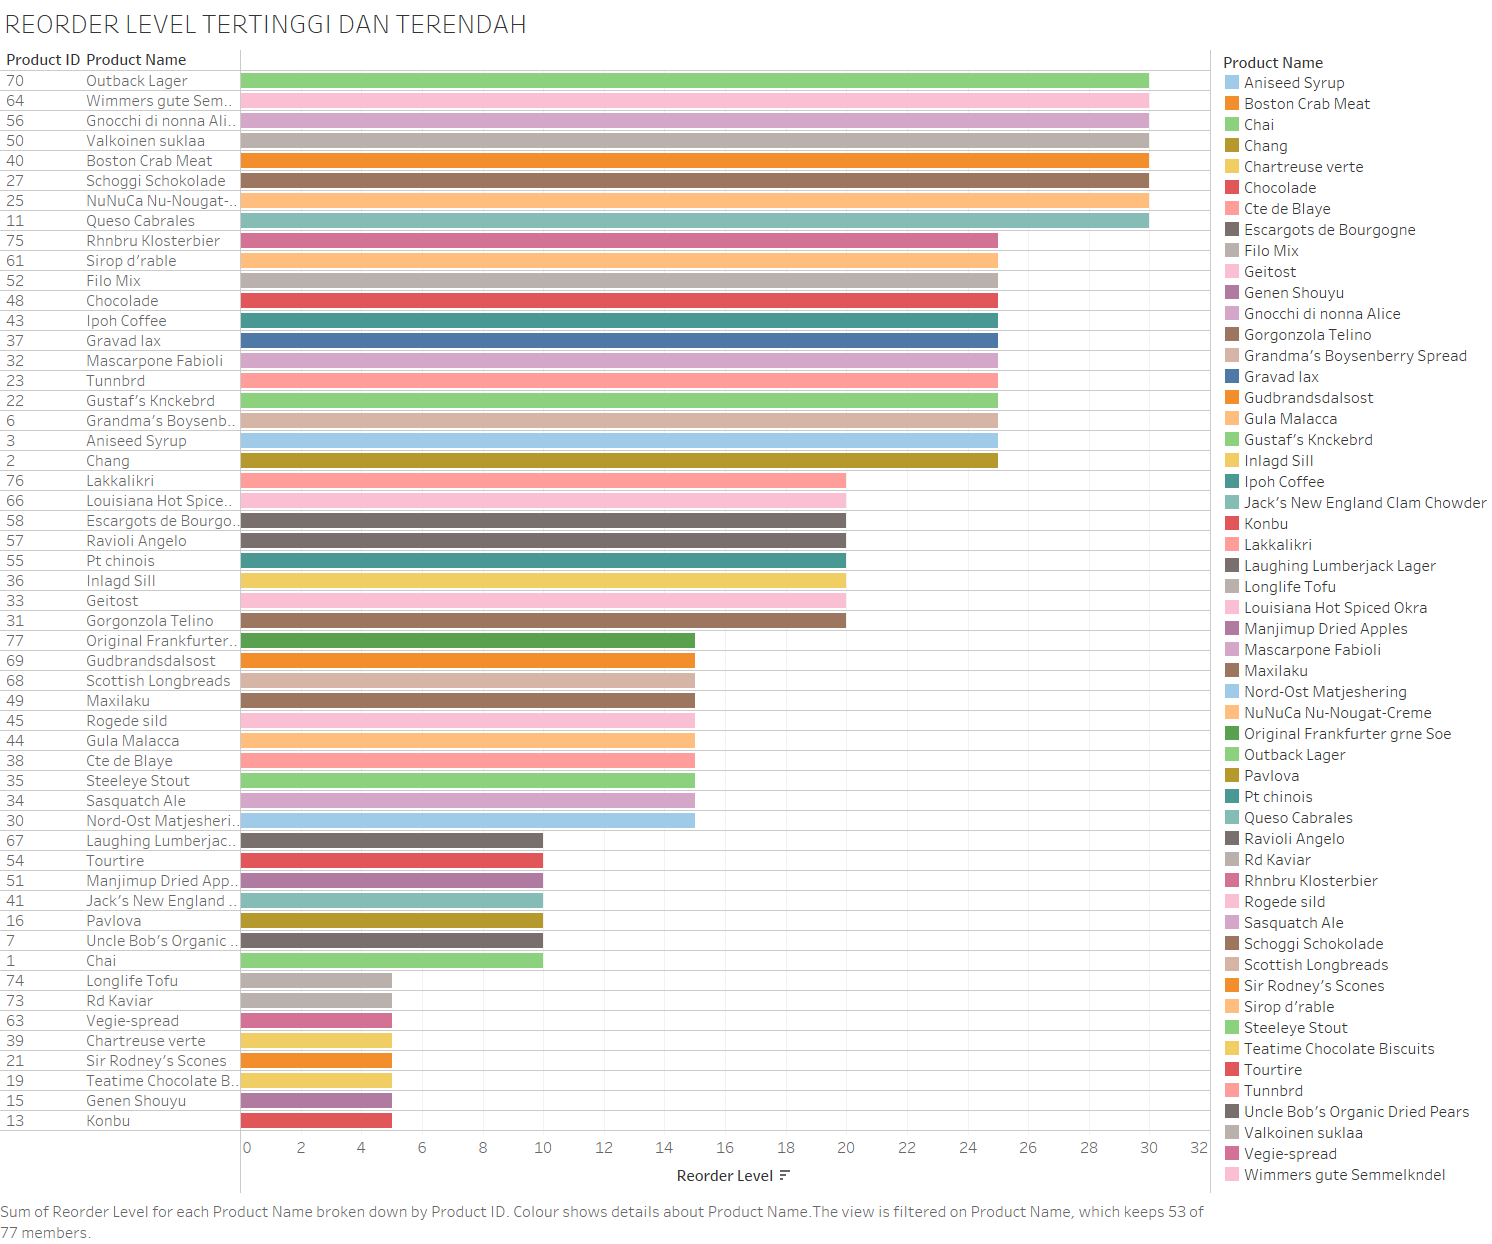

## **INSIGHT**

- Jika permintaan tinggi, reorder level akan tinggi tergantung oleh pemesanan dan pengiriman barang yang kemungkinan akan lama, oleh karena itu customer akan di beri tahu berapa lama stock akan kembali normal. Jadi dari pihak perusahaan akan berusaha mempercepat reorder level.
- Jika di suatu perusahaan tidak ada unit on order, tetapi terdapat re order level. Reorder Level akan berpindah ke stock ke gudang sampai permintaan kembali tinggi dan berhenti untuk re order level

Dengan asumsi, jika units in stock 5, units on order 10, akan terdapat re order level 5 dikarenakan unit in stock kurang. Jika di pertengahan jalan customer cancel pembelian tetapi re order level sudah berjalan. Jadi re order level 5 tersebut akan masuk units in stock.


### **PENGECEKAN DISTRIBUSI NORMAL UNITS IN STOCK SETIAP PRODUK**

In [24]:
# Uji Normalitas

from scipy.stats import shapiro

norm, pval = shapiro(tabel1['UnitsInStock'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUSI NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUSI NORMAL')

Tolak H0 Karena P-Value (4.2789446297319955e-07 < 5%)
DATA TIDAK BERDISTRIBUSI NORMAL


### **MENCARI MEDIAN ANTARA UNITS IN STOCK DAN DISCONTINUED**

In [25]:
from scipy.stats import mannwhitneyu
mann, pval = mannwhitneyu(
    tabel1[tabel1['Discontinued'] == 0]['UnitsInStock'],
    tabel1[tabel1['Discontinued'] == 1]['UnitsInStock']
) 

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('Terdapat Perbedaan Nilai Median UnitsInStock Antara False 0 and True 1 di dalam kolom Discontinued')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('Tidak Terdapat Perbedaan Nilai Median UnitsInStock Antara False 0 and True 1 di dalam kolom Discontinued')

Tolak H0 Karena P-Value (0.01112808031539042 < 5%)
Terdapat Perbedaan Nilai Median UnitsInStock Antara False 0 and True 1 di dalam kolom Discontinued


### **PENGECEKAN DISTRIBUSI NORMAL UNITS ON ORDER SETIAP PRODUK**

In [26]:
norm, pval = shapiro(tabel1['UnitsOnOrder'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUSI NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUSI NORMAL')

Tolak H0 Karena P-Value (1.076374571613338e-14 < 5%)
DATA TIDAK BERDISTRIBUSI NORMAL


### **MENCARI MEDIAN ANTARA UNITS ON ORDER DAN DISCONTINUED**

In [27]:
from scipy.stats import mannwhitneyu
mann, pval = mannwhitneyu(
    tabel1[tabel1['Discontinued'] == 0]['UnitsOnOrder'],
    tabel1[tabel1['Discontinued'] == 1]['UnitsOnOrder']
) 

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('Terdapat Perbedaan Nilai Median UnitsOnOrder Antara False 0 and True 1 di dalam kolom Discontinued')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('Tidak Terdapat Perbedaan Nilai Median UnitsOnOrder Antara False 0 and True 1 di dalam kolom Discontinued')

Gagal Tolak H0 Karena P-Value (0.12045421454804174 > 5%)
Tidak Terdapat Perbedaan Nilai Median UnitsOnOrder Antara False 0 and True 1 di dalam kolom Discontinued


### **PENGECEKAN DISTRIBUSI NORMAL REORDER LEVEL SETIAP PRODUK**

In [28]:
norm, pval = shapiro(tabel1['ReorderLevel'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUSI NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUSI NORMAL')

Tolak H0 Karena P-Value (9.389262913828134e-07 < 5%)
DATA TIDAK BERDISTRIBUSI NORMAL


### **MENCARI MEDIAN ANTARA REORDER LEVEL DAN DISCONTINUED**

In [29]:
from scipy.stats import mannwhitneyu
mann, pval = mannwhitneyu(
    tabel1[tabel1['Discontinued'] == 0]['ReorderLevel'],
    tabel1[tabel1['Discontinued'] == 1]['ReorderLevel']
) 

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('Terdapat Perbedaan Nilai Median ReorderLevel Antara False 0 and True 1 di dalam kolom Discontinued')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('Tidak Terdapat Perbedaan Nilai Median ReorderLevel Antara False 0 and True 1 di dalam kolom Discontinued')

Tolak H0 Karena P-Value (0.0003132448107026434 < 5%)
Terdapat Perbedaan Nilai Median ReorderLevel Antara False 0 and True 1 di dalam kolom Discontinued


### **KORELASI**

<AxesSubplot:>

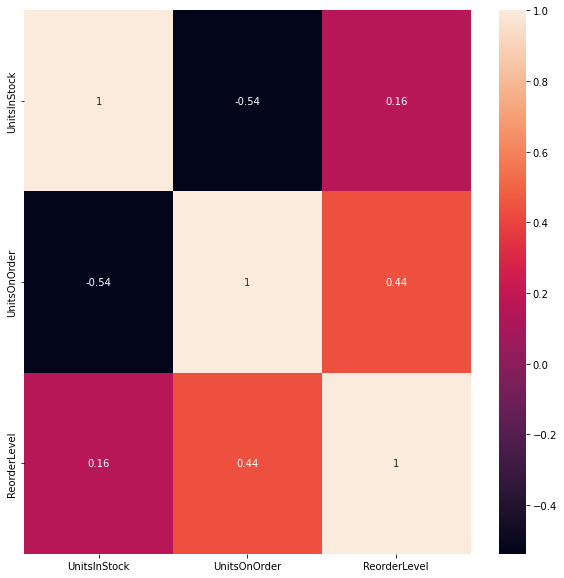

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(tabel1[['UnitsInStock', 'UnitsOnOrder', 'ReorderLevel']].corr('spearman'), annot=True)

### **INSIGHT**
1. UnitsInStock terhadap UnitsOnOrder berkolerasi tinggi dan berkorelasi negatif 

2. UnitsInStock terhadap ReorderLevel berkorelasi rendah dan berkorelasi positif

3. ReorderLeve terhadap UnitsInStock berkorelasi tinggi dan berkorelasi positif

## **REKOMENDASI**

Jika di suatu gudang stocknya terlalu banyak dan terlalu sedikit akan mempengaruhi masuk keluar barang 
dan demand/supply lalu akan mempengaruhi pendapat per tahun, 
jadi perusahaan harus berusaha untuk memberhentikan supply barang dari supplier 
atau berusaha untuk menjual barang yang stocknya terlalu banyak di gudang tersebut